<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 6: Multiclass Logistic Regression and Naive Bayes</h3>
<h3 align="center">25/10/2018</h3>

## <font color="#00cccc">Multi-class Logistic Regression <font/>

#### Binary Logistic Regression (sigmoid function)
$$P(y=C_1|x) = \sigma(w^Tx) = \frac{1}{1+e^{-w^Tx}} = \frac{e^{w^Tx}}{1+e^{w^Tx}}$$
$$P(y=C_2|x) = 1 - P(y=C_1|x) = \frac{1}{1+e^{w^Tx}}$$

#### Multi-class Logistic Regression (softmax function)
Assuming we have K classes
$$P(y=C_i|x) = \frac{e^{w_i^Tx}}{\sum_{k=1}^{K}{e^{w_k^Tx}}}$$
$$\sum_{i=1}^K P(y=C_i|x) = \sum_{i=1}^K \frac{e^{w_i^Tx}}{\sum_{k=1}^{K}{e^{w_k^Tx}}} = \frac{\sum_{i=1}^K e^{w_i^Tx}}{\sum_{k=1}^{K}{e^{w_k^Tx}}} = 1$$
Therefore, the softmax function still satisfies the condition of being a probability distribution of summing to one 

## What is the Iris dataset?

##### Attributes:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

We will just use two features for easier visualization; sepal length and width.

##### class: 
* Iris Setosa 
* Iris Versicolour 
* Iris Virginica

<img src="Lab6_petal_sepal.png">
source: https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png.html

### Load and Split Dataset

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import iris dataset
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)

del X, y
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples")

training set size: 112 samples 
test set size: 38 samples


### Preprocess Dataset

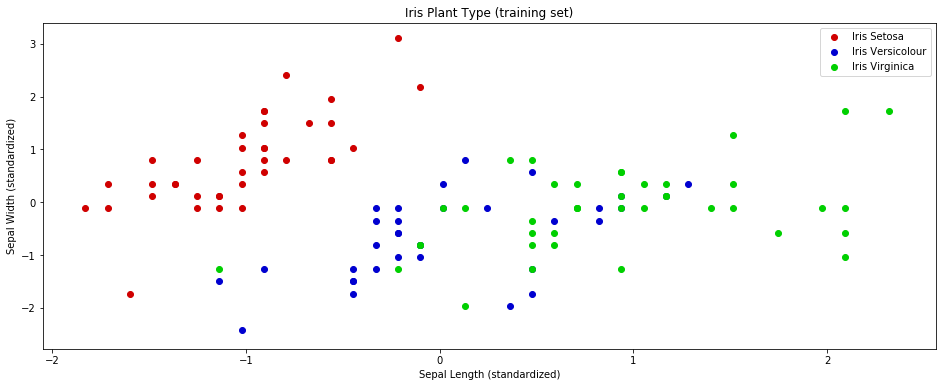

In [15]:
from sklearn.preprocessing import StandardScaler
from lab6_functions import plot_iris_data

#Standardize Dataset (substract training set mean and divide by training set standard deviation)
scaler = StandardScaler().fit(X_train) #the scaler is fitted to the training set (it gets the mean and std of the training set)
X_train_standardized = scaler.transform(X_train) #the scaler is applied to the training set
X_test_standardized = scaler.transform(X_test) #the scaler is applied to the test set
del X_train, X_test

#plot the data
plot_iris_data(X_train_standardized, y_train)

### <font color="#ef0000"> Exercise 1: Classify the iris dataset using scikit-learn LogisticRegression <font/>

#### <font color="#ef0000"> Write Your Code Here <font/>
<font color="#ef0000"> Use C=1e5 (nearly no regularization), multi_class='multinomial', solver='lbfgs' <font/>
<font color="#ef0000"> Put the classifier object in a variable called "classifier", Print the training and test error <font/>

In [16]:
from sklearn.linear_model import LogisticRegression

## write your code here
classifier = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
classifier.fit(X_train_standardized, y_train)
train_accuracy = classifier.score(X_train_standardized, y_train)
test_accuracy = classifier.score(X_test_standardized, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f}")

Training Accuracy: 84.82, Testing Accuracy: 76.32


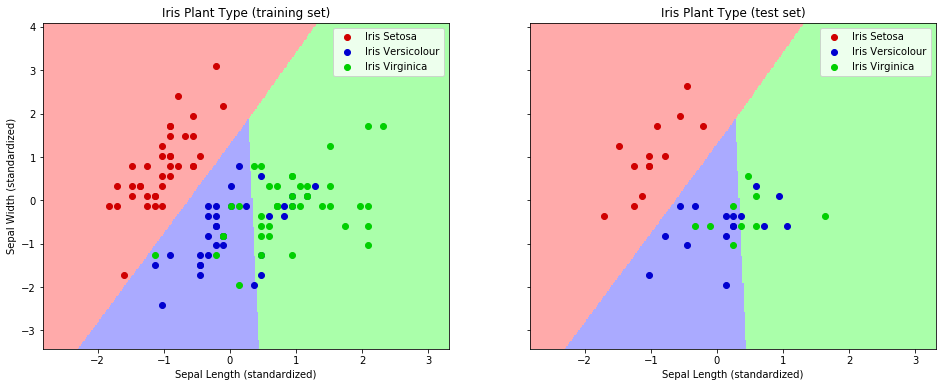

In [17]:
from lab6_functions import plot_iris_data_classified
plot_iris_data_classified(classifier, X_train_standardized, y_train, X_test_standardized, y_test, .02)

## <font color = "#af00af"> What is the C parameter? <font/>

## <font color="#cccc00">Naive Bayes <font/>

### Bayes Theorem:
$$p(C_k|x) = \frac{P(x|C_k) P(C_k)}{P(x)}$$

#### Where C_i is class i, and x is the feature vector

$$posterior = \frac{likelihood\ X\ prior}{evidence}$$

#### as P(x) is the same for all classes (constant)

$$p(C_k|x) \propto P(x|C_k) P(C_k)$$

$$p(C_k|x_1, x_2, ..., x_d) \propto P(x_1, x_2, ..., x_d|C_k) P(C_k)$$

#### where d is the number of features per sample

$$p(x_1, x_2, ..., x_d|C_k) = p(x_1|x_2, ..., x_d, C_k)p(x_2, ..., x_d, C_k) $$
$$ = p(x_1|x_2, ..., x_d, C_k)p(x_2|x_3, ..., x_d, C_k) ... p(x_d|C_k)$$

#### which is very hard to calculate, therefore we assume independence between features, and hence
$$p(x_1, x_2, ..., x_d|C_k) = p(x_1|C_k)p(x_2|C_k) ... p(x_d|C_k) = \prod_{i=1}^{d}p(x_i|C_k) $$

#### which leads to the follwing simplified equation

$$p(C_k|x) \propto p(C_k)\prod_{i=1}^{d}p(x_i|C_k) $$

#### We can now estimate the class based on the Maximum A Posteriori (MAP) estimate

$$\DeclareMathOperator*{\argmax}{arg\!\max}$$
$$\hat{y} = \argmax_{k\in\{1,...,K\}} p(C_k)\prod_{i=1}^{d}p(x_i|C_k) = \argmax_{k\in\{1,...,K\}} \log{p(C_k)}\sum_{i=1}^{d}\log{p(x_i|C_k)}$$

#### where K is the number of classes

## <font color = "#af00af"> Why is it called "Naive" Bayes? <font/>

## <font color = "#af00af"> How can we estimate prior $p(C_k)$? <font/>

## <font color = "#af00af"> How can we estimate likelihood $p(x_i|C_k)$? <font/>

### Gaussian Naive Bayes

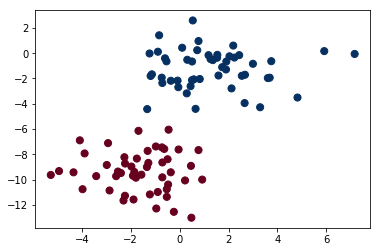

In [37]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X__, y__ = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X__[:, 0], X__[:, 1], c=y__, s=50, cmap='RdBu');
plt.show()

<img src="Lab6_gaussian_NB.png">
source: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

### <font color="#ef0000"> Exercise 2: Classify the iris dataset using scikit-learn GaussianNB <font/>

#### <font color="#ef0000"> Write Your Code Here <font/>
<font color="#ef0000"> Put the classifier object in a variable called "classifier", Print the training and test error <font/>

In [35]:
from sklearn.naive_bayes import GaussianNB

## write your code here
classifier = GaussianNB()
classifier.fit(X_train_standardized, y_train)
train_accuracy = classifier.score(X_train_standardized, y_train)
test_accuracy = classifier.score(X_test_standardized, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}, Testing Accuracy: {test_accuracy*100:.2f}")

Training Accuracy: 81.25, Testing Accuracy: 76.32


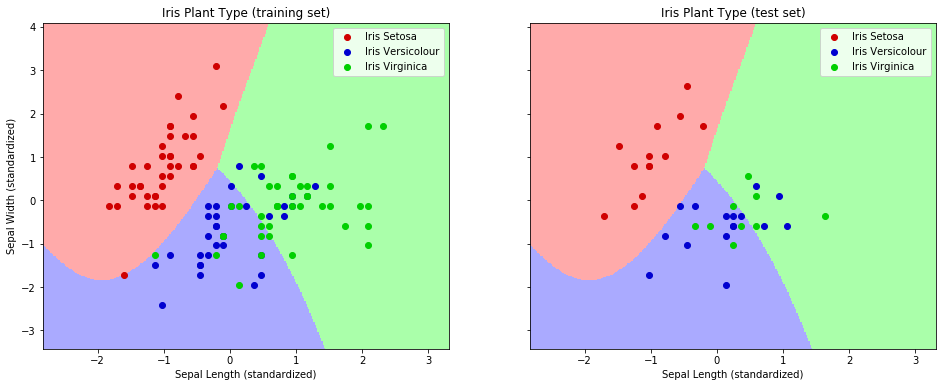

In [36]:
from lab6_functions import plot_iris_data_classified
plot_iris_data_classified(classifier, X_train_standardized, y_train, X_test_standardized, y_test, .02)

## <font color = "#af00af"> How does GaussianNB function estimate the mean $\mu$ and the variance $\sigma$ of the normally distributed likelihood of the features? <font/>
<font color = "#af00af"> $$p(x_i|C_k) = \frac{1}{\sqrt{2\pi\sigma_y^2}}\exp{-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}}$$<font/>

## <font color = "#af00af"> What to do if the features are binary or represent count (number of occurances)? <font/>